# CS5228-KDDM, 2024/25-2, Coursework 1

Introduction
- This coursework comprises two parts. Part 1 involves Python programming for regression and classification, and Part 2 contains four MCQs. 
- Total CA marks of this coursework is 12. Details of marks/parts are below. 
- A Canvas quiz will be open for your coursework submission.  
- For Python programming parts, I urge you to complete a Jupyter notebook and submit it. Cw2-template.ipynb is the template for your answer. You have to run your codes and get sure that answers are available in the notebook before submission. 
- Regarding MCQs, there is one and only one correct answer for each question. So select the best option. There is no penalty for wrong answers. 
- The deadline for this coursework is 30/3/2025. Please be aware that no delayed submission is possible. 
#### Good luck, my friends. 


#### Student Name: Himanshu Maithani
#### Student Number: A0314584B

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (mean_squared_error, mean_absolute_error, 
                             precision_score, recall_score, accuracy_score, 
                             confusion_matrix, classification_report)


## CW2, Part 1: Regression and Classification (3+3= 6 marks)

### CW2-1: Regression (3 marks)
Datasets: cs5228-housing.csv 


First few rows of the dataset:
     price   area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  6510000   6670         3          1        3      yes        no      yes   
1  5880000   7160         3          1        1      yes        no      yes   
2  5873000  11460         3          1        3      yes        no       no   
3  3430000   2610         3          1        2      yes        no      yes   
4  3850000   7152         3          1        2      yes        no       no   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  \
0              no              no        0      yes      unfurnished   
1              no              no        2      yes      unfurnished   
2              no              no        2      yes   semi-furnished   
3              no              no        0      yes      unfurnished   
4              no             yes        0       no        furnished   

  class_label  
0   expensive  
1   expensive  
2   expensive

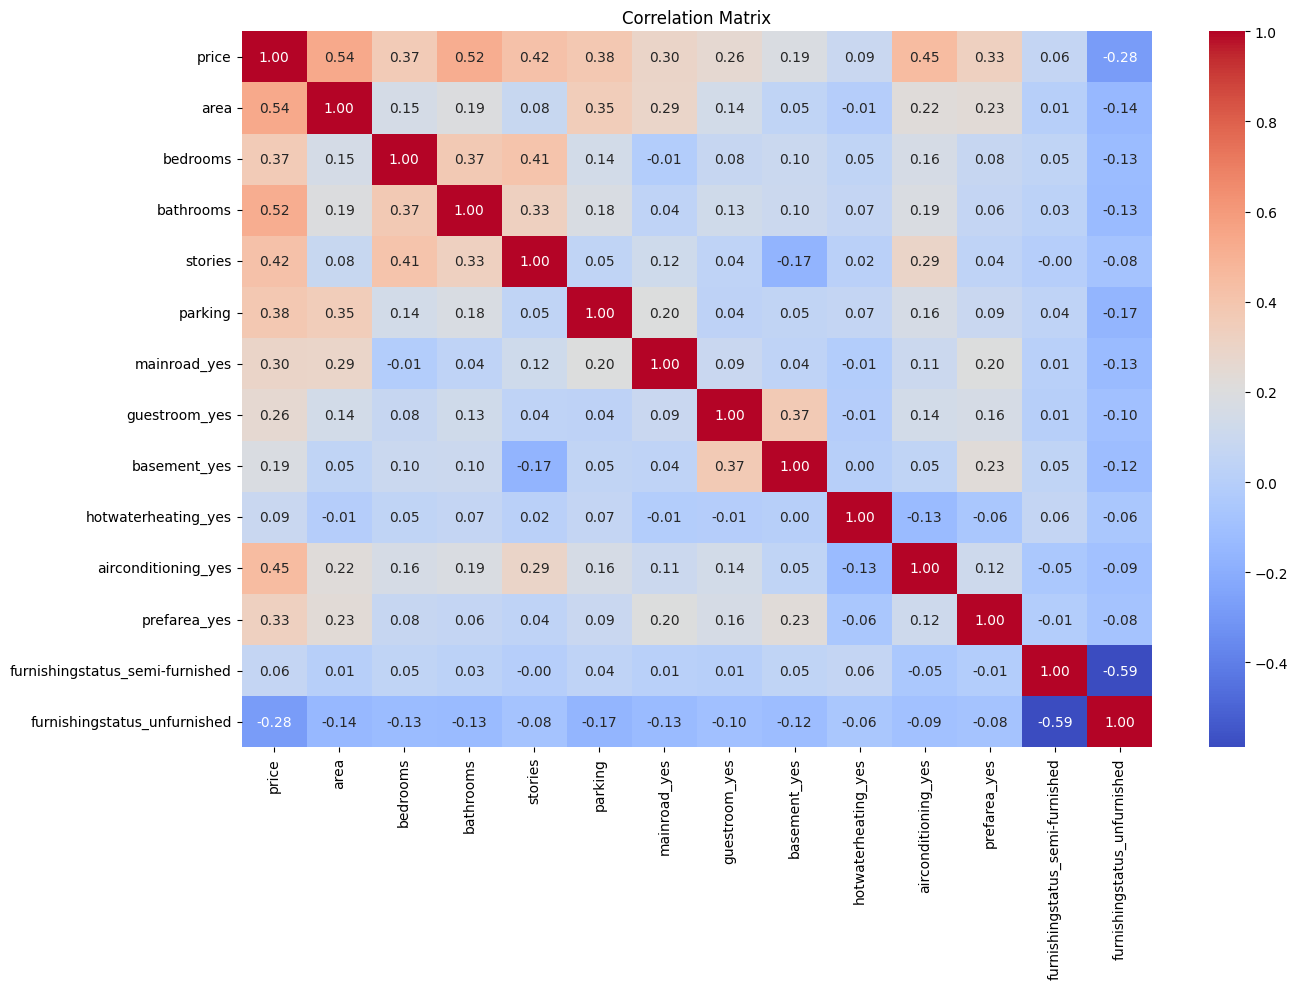

Correlations with price:
price                              1.000000
area                               0.535997
bathrooms                          0.517545
airconditioning_yes                0.452954
stories                            0.420712
parking                            0.384394
bedrooms                           0.366494
prefarea_yes                       0.329777
mainroad_yes                       0.296898
guestroom_yes                      0.255517
basement_yes                       0.187057
hotwaterheating_yes                0.093073
furnishingstatus_semi-furnished    0.063656
furnishingstatus_unfurnished      -0.280587
Name: price, dtype: float64

Train size: 490 Test size: 55

Linear Regression default hyperparameters:
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

No Scaling -> Train MSE: 1156451893929.46, MAE: 790824.00
No Scaling -> Test MSE: 751319040080.74, MAE: 704220.55

With Scaling -> Train MSE: 1156451893929.46, MAE: 790824.00
With 

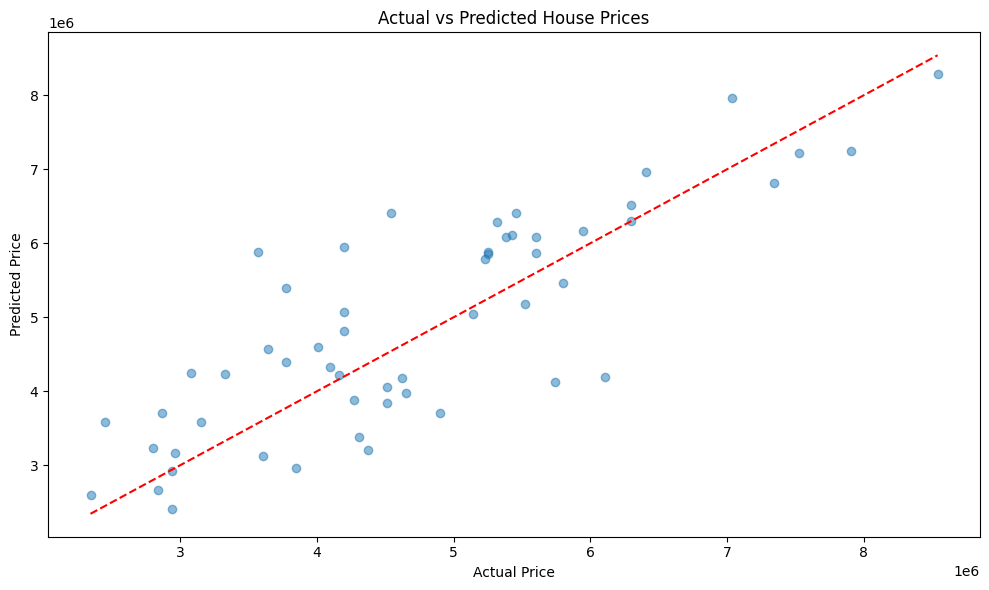

In [5]:
# CW2-1: Regression

# Load and explore data
df = pd.read_csv('cs5228-Housing.csv')
print("First few rows of the dataset:")
print(df.head())
print("\nDataset info:")
print(df.info())
print("\nStatistical description:")
print(df.describe())
print("\nMissing values per column:")
print(df.isnull().sum())

# Define features
cat_feats = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
num_feats = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
print("\nCategorical Features:", cat_feats)
print("Numerical Features:", num_feats)

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df.drop('class_label', axis=1), columns=cat_feats, drop_first=True)

# Correlation analysis
plt.figure(figsize=(14, 10))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

print("Correlations with price:")
price_corr = df_encoded.corr()['price'].sort_values(ascending=False)
print(price_corr)

# Prepare regression data
# Ignore 'class_label'
X = df.drop(['price', 'class_label'], axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=110)
print("\nTrain size:", X_train.shape[0], "Test size:", X_test.shape[0])

# Check LinearRegression hyperparameters
print("\nLinear Regression default hyperparameters:")
print(LinearRegression().get_params())

# Model 1: Without Scaling
preproc_no_scale = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(drop='first', sparse_output=False), cat_feats)],
    remainder='passthrough'
)
model_no_scale = Pipeline(steps=[('preprocessor', preproc_no_scale),
                                 ('regressor', LinearRegression())])
model_no_scale.fit(X_train, y_train)
y_train_pred_ns = model_no_scale.predict(X_train)
y_test_pred_ns = model_no_scale.predict(X_test)
mse_train_ns = mean_squared_error(y_train, y_train_pred_ns)
mae_train_ns = mean_absolute_error(y_train, y_train_pred_ns)
mse_test_ns = mean_squared_error(y_test, y_test_pred_ns)
mae_test_ns = mean_absolute_error(y_test, y_test_pred_ns)
print("\nNo Scaling -> Train MSE: {:.2f}, MAE: {:.2f}".format(mse_train_ns, mae_train_ns))
print("No Scaling -> Test MSE: {:.2f}, MAE: {:.2f}".format(mse_test_ns, mae_test_ns))

# Model 2: With Scaling
preproc_scale = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_feats),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), cat_feats)
    ]
)
model_scale = Pipeline(steps=[('preprocessor', preproc_scale),
                              ('regressor', LinearRegression())])
model_scale.fit(X_train, y_train)
y_train_pred_s = model_scale.predict(X_train)
y_test_pred_s = model_scale.predict(X_test)
mse_train_s = mean_squared_error(y_train, y_train_pred_s)
mae_train_s = mean_absolute_error(y_train, y_train_pred_s)
mse_test_s = mean_squared_error(y_test, y_test_pred_s)
mae_test_s = mean_absolute_error(y_test, y_test_pred_s)
print("\nWith Scaling -> Train MSE: {:.2f}, MAE: {:.2f}".format(mse_train_s, mae_train_s))
print("With Scaling -> Test MSE: {:.2f}, MAE: {:.2f}".format(mse_test_s, mae_test_s))

# Model 3: Feature selection remove numerical features with low correlation
num_corr = df[num_feats + ['price']].corr()['price']
low_corr = [f for f in num_feats if abs(num_corr[f]) < 0.1]
print("\nLow correlation numerical features to be removed:", low_corr)
if low_corr:
    sel_num_feats = [f for f in num_feats if f not in low_corr]
    preproc_sel = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), sel_num_feats),
            ('cat', OneHotEncoder(drop='first', sparse_output=False), cat_feats)
        ]
    )
    model_sel = Pipeline(steps=[('preprocessor', preproc_sel),
                                ('regressor', LinearRegression())])
    model_sel.fit(X_train, y_train)
    y_train_pred_sel = model_sel.predict(X_train)
    y_test_pred_sel = model_sel.predict(X_test)
    mse_train_sel = mean_squared_error(y_train, y_train_pred_sel)
    mae_train_sel = mean_absolute_error(y_train, y_train_pred_sel)
    mse_test_sel = mean_squared_error(y_test, y_test_pred_sel)
    mae_test_sel = mean_absolute_error(y_test, y_test_pred_sel)
    print("Feature Selection -> Train MSE: {:.2f}, MAE: {:.2f}".format(mse_train_sel, mae_train_sel))
    print("Feature Selection -> Test MSE: {:.2f}, MAE: {:.2f}".format(mse_test_sel, mae_test_sel))
else:
    print("No numerical features removed based on correlation threshold.")

# Final Model Selection based on best test MAE
if 'mae_test_sel' in locals() and (mae_test_sel < mae_test_s) and (mae_test_sel < mae_test_ns):
    best_model = model_sel
    final_mse_train, final_mae_train = mse_train_sel, mae_train_sel
    final_mse_test, final_mae_test = mse_test_sel, mae_test_sel
    final_model_desc = "Linear Regression with Feature Selection; Removed: " + str(low_corr)
elif mae_test_s < mae_test_ns:
    best_model = model_scale
    final_mse_train, final_mae_train = mse_train_s, mae_train_s
    final_mse_test, final_mae_test = mse_test_s, mae_test_s
    final_model_desc = "Linear Regression with Scaling"
else:
    best_model = model_no_scale
    final_mse_train, final_mae_train = mse_train_ns, mae_train_ns
    final_mse_test, final_mae_test = mse_test_ns, mae_test_ns
    final_model_desc = "Linear Regression without Scaling"
    
print("\nFinal Model Selection:", final_model_desc)
print("Final Train MSE: {:.2f}, MAE: {:.2f}".format(final_mse_train, final_mae_train))
print("Final Test MSE: {:.2f}, MAE: {:.2f}".format(final_mse_test, final_mae_test))

# Visualization: Actual vs. Predicted Prices
y_pred = best_model.predict(X_test)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted House Prices')
plt.tight_layout()
plt.show()


### CW1-2-2: Classification (3 marks) 
Datasets: cs5228-housing.csv  


     price   area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  6510000   6670         3          1        3      yes        no      yes   
1  5880000   7160         3          1        1      yes        no      yes   
2  5873000  11460         3          1        3      yes        no       no   
3  3430000   2610         3          1        2      yes        no      yes   
4  3850000   7152         3          1        2      yes        no       no   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  \
0              no              no        0      yes      unfurnished   
1              no              no        2      yes      unfurnished   
2              no              no        2      yes   semi-furnished   
3              no              no        0      yes      unfurnished   
4              no             yes        0       no        furnished   

  class_label  
0   expensive  
1   expensive  
2   expensive  
3      medium  
4      mediu

c:\Users\himan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\himan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\himan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

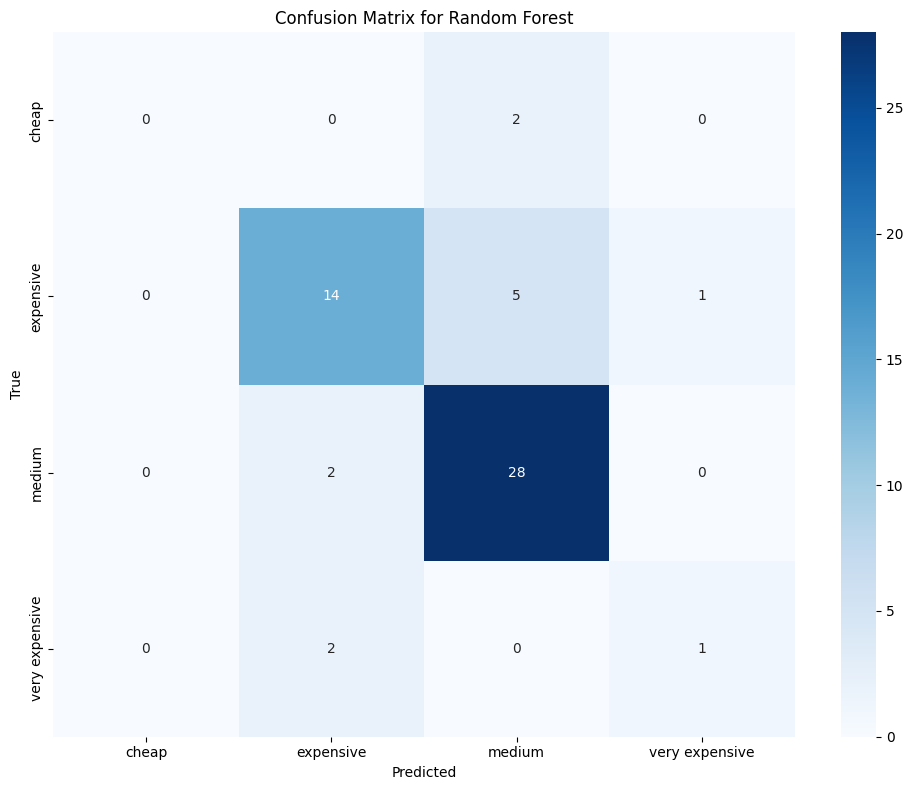

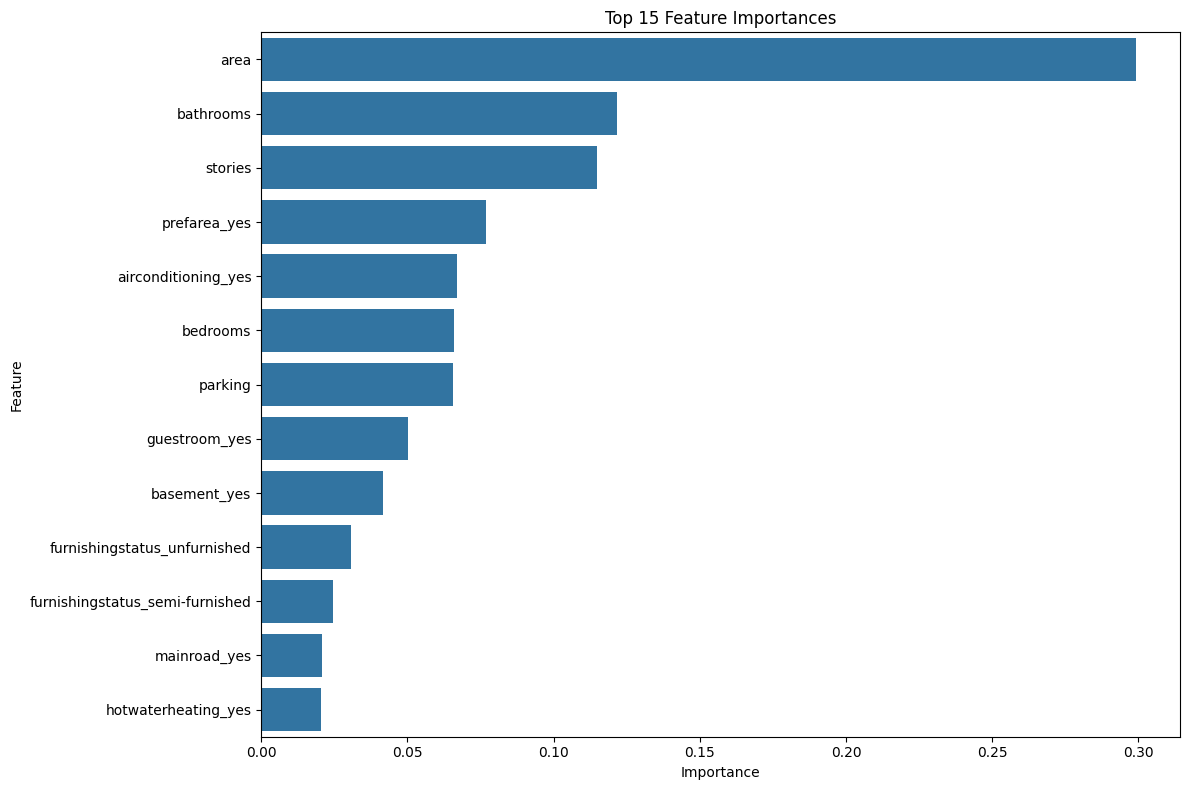

Top 10 Features:
                         Feature  Importance
0                           area    0.299275
2                      bathrooms    0.121822
3                        stories    0.114893
10                  prefarea_yes    0.076766
9            airconditioning_yes    0.066953
1                       bedrooms    0.066009
4                        parking    0.065766
6                  guestroom_yes    0.050118
7                   basement_yes    0.041713
12  furnishingstatus_unfurnished    0.030647


In [ ]:
# CW2-2: Classification

# Load and explore data
df = pd.read_csv('cs5228-Housing.csv')
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())
print("Class distribution:")
print(df['class_label'].value_counts())

# Define features and target
cat_feats = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
num_feats = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
X = df.drop(['price', 'class_label'], axis=1)
y = df['class_label']
print("Categorical:", cat_feats, "Numerical:", num_feats)

# One-hot encoding 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=110)
print("Train size:", X_train.shape[0], "Test size:", X_test.shape[0])

# Preprocessor for categorical (no scaling)
cat_preproc = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(drop='first', sparse_output=False), cat_feats)],
    remainder='passthrough'
)

# Decision Tree baseline (no scaling)
dt_pipe_no_scale = Pipeline(steps=[('preprocessor', cat_preproc),
                                   ('classifier', DecisionTreeClassifier(random_state=110))])
dt_pipe_no_scale.fit(X_train, y_train)
y_train_pred_dt_ns = dt_pipe_no_scale.predict(X_train)
y_test_pred_dt_ns = dt_pipe_no_scale.predict(X_test)
print("DT No Scaling -> Train Acc:", accuracy_score(y_train, y_train_pred_dt_ns),
      "Test Acc:", accuracy_score(y_test, y_test_pred_dt_ns))

# Preprocessor with scaling
preproc = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_feats),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), cat_feats)
    ]
)

# Decision Tree with scaling & tuning
dt_pipe = Pipeline(steps=[('preprocessor', preproc),
                          ('classifier', DecisionTreeClassifier(random_state=110))])
dt_param_grid = {
    'classifier__max_depth': [None, 5, 10, 15, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__criterion': ['gini', 'entropy']
}
dt_grid = GridSearchCV(dt_pipe, dt_param_grid, cv=5, scoring='accuracy')
dt_grid.fit(X_train, y_train)
print("DT Best Params:", dt_grid.best_params_)
dt_best = dt_grid.best_estimator_
y_train_pred_dt = dt_best.predict(X_train)
y_test_pred_dt = dt_best.predict(X_test)
print("DT Tuning -> Train Acc:", accuracy_score(y_train, y_train_pred_dt),
      "Test Acc:", accuracy_score(y_test, y_test_pred_dt))

# Random Forest baseline (no scaling)
rf_pipe_ns = Pipeline(steps=[('preprocessor', cat_preproc),
                             ('classifier', RandomForestClassifier(random_state=110))])
rf_pipe_ns.fit(X_train, y_train)
y_train_pred_rf_ns = rf_pipe_ns.predict(X_train)
y_test_pred_rf_ns = rf_pipe_ns.predict(X_test)
print("RF No Scaling -> Train Acc:", accuracy_score(y_train, y_train_pred_rf_ns),
      "Test Acc:", accuracy_score(y_test, y_test_pred_rf_ns))

# Random Forest with scaling & tuning
rf_pipe = Pipeline(steps=[('preprocessor', preproc),
                          ('classifier', RandomForestClassifier(random_state=110))])
rf_param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}
rf_grid = GridSearchCV(rf_pipe, rf_param_grid, cv=5, scoring='accuracy')
rf_grid.fit(X_train, y_train)
print("RF Best Params:", rf_grid.best_params_)
rf_best = rf_grid.best_estimator_
y_train_pred_rf = rf_best.predict(X_train)
y_test_pred_rf = rf_best.predict(X_test)
print("RF Tuning -> Train Acc:", accuracy_score(y_train, y_train_pred_rf),
      "Test Acc:", accuracy_score(y_test, y_test_pred_rf))

# Choose best model based on test accuracy
if accuracy_score(y_test, y_test_pred_rf) > accuracy_score(y_test, y_test_pred_dt):
    best_model = rf_best; best_name = "Random Forest"; y_test_pred = y_test_pred_rf
else:
    best_model = dt_best; best_name = "Decision Tree"; y_test_pred = y_test_pred_dt

print(f"Final Results for {best_name}:")
print("Train Acc:", accuracy_score(y_train, best_model.predict(X_train)))
print("Test Acc:", accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted'); plt.ylabel('True')
plt.title(f'Confusion Matrix for {best_name}'); plt.tight_layout(); plt.show()

# Feature Importance (Random Forest)
if best_name == "Random Forest" and hasattr(best_model.named_steps['classifier'], 'feature_importances_'):
    preproc_obj = best_model.named_steps['preprocessor']
    cat_feat_names = preproc_obj.transformers_[1][1].get_feature_names_out(cat_feats)
    all_feats = num_feats + list(cat_feat_names)
    feat_imp = best_model.named_steps['classifier'].feature_importances_
    imp_df = pd.DataFrame({'Feature': all_feats, 'Importance': feat_imp}).sort_values('Importance', ascending=False)
    plt.figure(figsize=(12,8))
    sns.barplot(x='Importance', y='Feature', data=imp_df.head(15))
    plt.title('Top 15 Feature Importances'); plt.tight_layout(); plt.show()
    print("Top 10 Features:"); print(imp_df.head(10))
